# How to work with the PDTB

_based on the course "Computational Pragmatics" by Chris Potts_ 

Shared under a cc-by-nc-sa license.
https://creativecommons.org/licenses/by-nc-sa/3.0/

## Loading & accessing the corpus

We can access the corpus using the compiled csv-version (a tabular format with one relation per line): https://boxup.uni-potsdam.de/index.php/s/MxSceyJFraNz5cm (you should know the password). The corpus is provided only as part of the workshop and its data must be removed by participants upon completion.

The python package `pdtb` provides an iterator over the data points in the corpus.

In [8]:
# Needs NLTK

from collections import defaultdict
from pdtb import CorpusReader, Datum

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("white")


pdtb = CorpusReader('/Users/elizabethlorelei/Downloads/pdtb2.csv')


In [2]:
def relation_count():
    """Calculate and display the distribution of relations."""
    # Create a count dictionary of relations.
    d = defaultdict(int)
    for datum in pdtb.iter_data():
        if datum.Relation == None:
            break
        d[datum.Relation] += 1
    # Print the results to standard output.
    for key, val in d.items():
        print(key, val)
    return()

# This will take a long time, so run with caution!
relation_count()

row 40600

EntRel 5210
Explicit 18459
Implicit 16053
NoRel 254
AltLex 624


()

## Exploring the corpus

* Example relation:

In [3]:
# for datum in pdtb.iter_data():
#     print(datum)
#     break
    
print(next(pdtb.iter_data()))


row 1

Pierre Vinken, 61 years old, will join the board as a nonexecutive director Nov. 29. Mr. Vinken is chairman of Elsevier N.V., the Dutch publishing group


* What information do we have for each relation?

In [4]:
Datum.header


['Relation',
 'Section',
 'FileNumber',
 'Connective_SpanList',
 'Connective_GornList',
 'Connective_Trees',
 'Connective_RawText',
 'Connective_StringPosition',
 'SentenceNumber',
 'ConnHead',
 'Conn1',
 'Conn2',
 'ConnHeadSemClass1',
 'ConnHeadSemClass2',
 'Conn2SemClass1',
 'Conn2SemClass2',
 'Attribution_Source',
 'Attribution_Type',
 'Attribution_Polarity',
 'Attribution_Determinacy',
 'Attribution_SpanList',
 'Attribution_GornList',
 'Attribution_Trees',
 'Attribution_RawText',
 'Arg1_SpanList',
 'Arg1_GornList',
 'Arg1_Trees',
 'Arg1_RawText',
 'Arg1_Attribution_Source',
 'Arg1_Attribution_Type',
 'Arg1_Attribution_Polarity',
 'Arg1_Attribution_Determinacy',
 'Arg1_Attribution_SpanList',
 'Arg1_Attribution_GornList',
 'Arg1_Attribution_Trees',
 'Arg1_Attribution_RawText',
 'Arg2_SpanList',
 'Arg2_GornList',
 'Arg2_Trees',
 'Arg2_RawText',
 'Arg2_Attribution_Source',
 'Arg2_Attribution_Type',
 'Arg2_Attribution_Polarity',
 'Arg2_Attribution_Determinacy',
 'Arg2_Attribution_SpanLi

In [5]:
ex_item = next(x for i,x in enumerate(pdtb.iter_data()) if i==3) # Get the 3rd relation
print(ex_item.Relation,ex_item.ConnHead,ex_item.FullRawText)

print("Arg1 = " + ex_item.Arg1_RawText)
print("Arg2 = " + ex_item.Arg2_RawText)

row 4

Explicit although Although preliminary findings were reported more than a year ago, the latest results appear in today's New England Journal of Medicine, a forum likely to bring new attention to the problem
Arg1 = the latest results appear in today's New England Journal of Medicine, a forum likely to bring new attention to the problem
Arg2 = preliminary findings were reported more than a year ago


## Semantic classes

We can look at the semantic classes present in the corpus.

*NOTE:* This is the 2.0 version of the PDTB, which still uses the (deprecated) PDTB 2.0 set of relations. PDTB 3.0 has just been released.

In [6]:
def count_semantic_classes():
    """Count ConnHeadSemClass1 values."""
    d = defaultdict(int)
    exp = defaultdict(int)
    imp = defaultdict(int)
    for datum in pdtb.iter_data():
        sc = datum.ConnHeadSemClass1
        # Filter None values (should be just EntRel/NonRel data).
        if sc:
            d[sc] += 1
            if datum.Relation == "Explicit":
                exp[sc] += 1
            elif datum.Relation == "Implicit":
                imp[sc] += 1
    return (d,exp,imp)

(sem_all, sem_exp, sem_imp) = count_semantic_classes()

row 40600


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]), <a list of 41 Text xticklabel objects>)

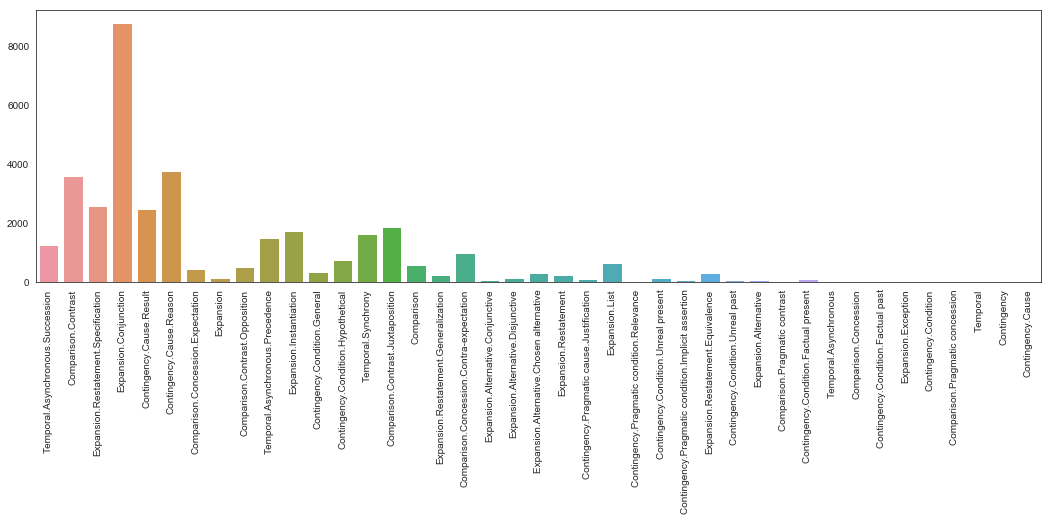

In [11]:
from matplotlib import pylab
from pylab import *
pylab.rcParams['figure.figsize'] = (18, 5)

ax = sns.barplot(list(sem_all.keys()), list(sem_all.values()))
xticks(rotation='vertical')


No handles with labels found to put in legend.


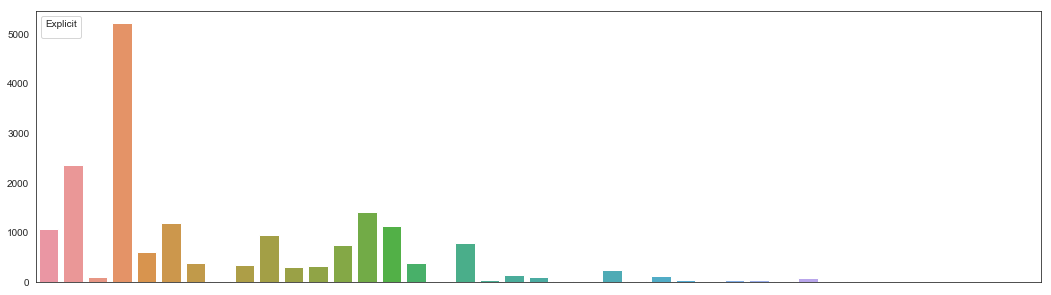

No handles with labels found to put in legend.


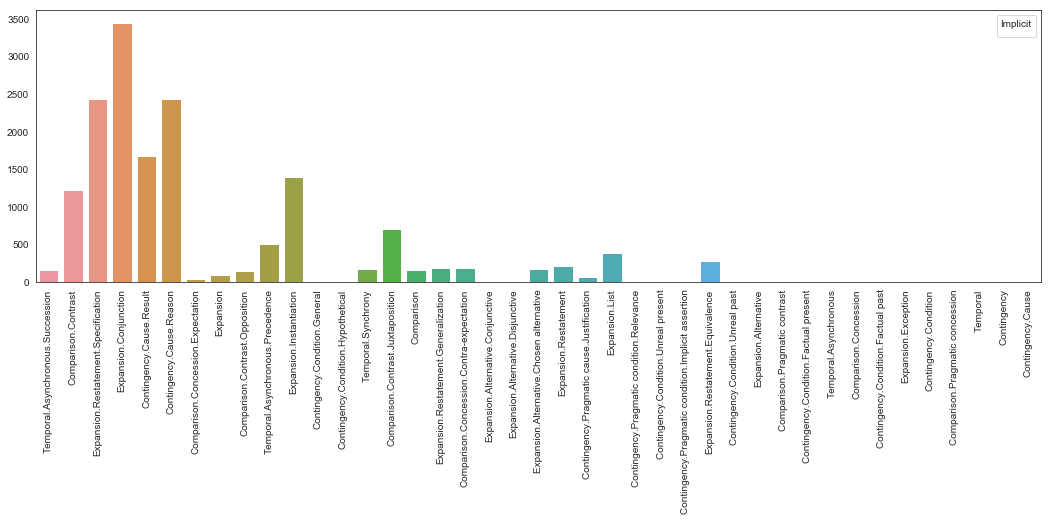

In [12]:
ax = sns.barplot(list(sem_exp.keys()), list(sem_exp.values()), order=sem_all.keys())
ax.set_xticks([])
plt.legend(title="Explicit")
plt.show()
ax = sns.barplot(list(sem_imp.keys()), list(sem_imp.values()), order=sem_all.keys())
xticks(rotation='vertical')
plt.legend(title="Implicit")
plt.show()

## Connectives

Looking at the connectives (only for *Explicit* relations):

In [13]:
def print_connectives():
    """Print all connectives."""
    d = defaultdict(int)
    for datum in pdtb.iter_data():
        if datum.Relation == "Explicit":
            conn = datum.ConnHead
            d[conn] += 1
    return d

ALL_CONNECTIVES = print_connectives()

row 40600


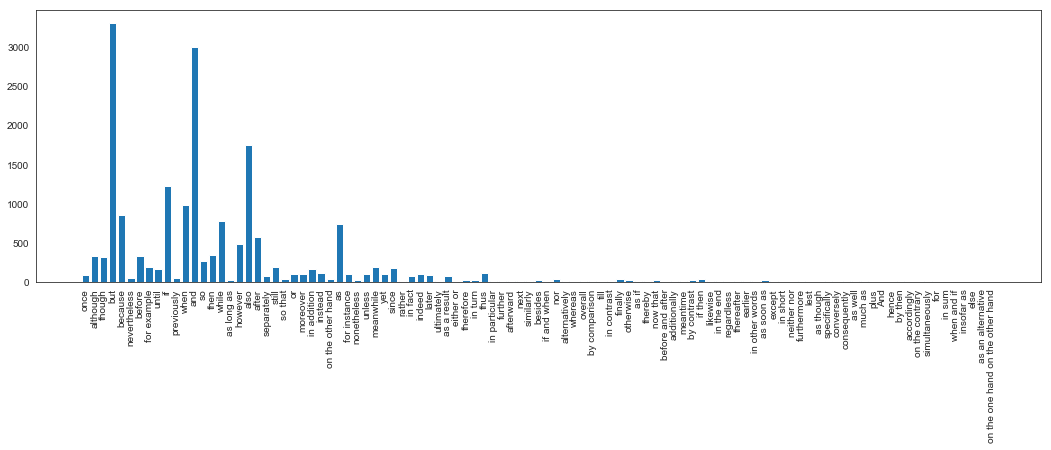

In [14]:
plt.bar(*zip(*ALL_CONNECTIVES.items()))
xticks(rotation='vertical')

plt.show()

<div class="alert alert-block alert-info">
**Question 1:** How are the connectives distributed in Explicit vs. Implicit relations (similar to the senses we looked at)?
</div>

## Answering some questions about the data

### Disconnected argument spans


<div class="alert alert-block alert-info">
**Question 2:** When does it happen that argument spans are not continuous (that is, something is "missing" from within either argument)?
</div>

In [15]:
ex_item.Arg2_SpanList

[[543, 598]]

In [16]:
i = 0
for datum in pdtb.iter_data():
    i+=1
    if i>200:
        break
    if datum.Relation=="Explicit":
        arg1spans = datum.Arg1_SpanList
        arg2spans = datum.Arg2_SpanList
        if len(arg1spans)+len(arg2spans)>2:
            print(datum.ConnHead, datum.Connective_SpanList,arg1spans,arg2spans)
            print(datum)
        

row 100

before [[1147, 1153]] [[1051, 1063], [1121, 1146]] [[1154, 1222]]
Nevertheless, said Brenda Malizia Negus, editor of Money Fund Report, yields "may blip up again before they blip down" because of recent rises in short-term interest rates
for example [[1288, 1299]] [[1051, 1063], [1121, 1222]] [[1224, 1286], [1301, 1325]]
Nevertheless, said Brenda Malizia Negus, editor of Money Fund Report, yields "may blip up again before they blip down" because of recent rises in short-term interest rates. The yield on six-month Treasury bills sold at Monday's auction, for example, rose to 8.04% from 7.90%
also [[1397, 1401]] [[1208, 1384]] [[1388, 1396], [1402, 1465]]
When we evaluated raising our bid, the risks seemed substantial and persistent over the next five years, and the rewards seemed a long way out. That got hard to take," he added.  Mr. Rowe also noted that political concerns also worried New England Electric
also [[1432, 1436]] [[993, 1205]] [[1408, 1431], [1437, 1465]]
the company's retu

still [[2427, 2432]] [[2218, 2378]] [[2423, 2426], [2433, 2474]]
Separately, the Federal Energy Regulatory Commission turned down for now a request by Northeast seeking approval of its possible purchase of PS of New Hampshire. Northeast said it would refile its request and still hopes for an expedited review by the FERC so that it could complete the purchase by next summer if its bid is the one approved by the bankruptcy court
if [[546, 548]] [[420, 523]] [[543, 545], [549, 596]]
that Cray Research Inc. will withdraw the almost $100 million in financing it is providing the new firm if Mr. Cray leaves or if the product-design project he heads is scrapped
also [[614, 618]] [[327, 596]] [[600, 613], [619, 803]]
Documents filed with the Securities and Exchange Commission on the pending spinoff disclosed that Cray Research Inc. will withdraw the almost $100 million in financing it is providing the new firm if Mr. Cray leaves or if the product-design project he heads is scrapped.  The docume

row 201

for example [[379, 390]] [[315, 360]] [[362, 377], [392, 469]]
The computers were crude by today's standards. Apple II owners, for example, had to use their television sets as screens and stored data on audiocassettes


### Looking at syntactic trees

Potts has also included the syntactic trees of arguments (and connectives) in the same data structure. This means we can look at them and for example see which types of arguments occur for certain connectives, etc.

In [17]:
i = 0
for datum in pdtb.iter_data():
    i+=1
    if i>200:
        break
    if datum.Relation=="Implicit":
        print(datum)
        print(datum.Arg1_Trees)
        print(datum.Arg2_Trees)
        break
 

row 5

This is an old story. We're talking about years ago before anyone heard of asbestos having any questionable properties
[Tree('S', [Tree('NP-SBJ', [Tree('DT', ['This'])]), Tree('VP', [Tree('VBZ', ['is']), Tree('NP-PRD', [Tree('DT', ['an']), Tree('JJ', ['old']), Tree('NN', ['story'])])])])]
[Tree('S', [Tree('NP-SBJ', [Tree('PRP', ['We'])]), Tree('VP', [Tree('VBP', ["'re"]), Tree('VP', [Tree('VBG', ['talking']), Tree('PP-CLR', [Tree('IN', ['about']), Tree('ADVP-TMP', [Tree('ADVP', [Tree('NP', [Tree('NNS', ['years'])]), Tree('IN', ['ago'])]), Tree('SBAR', [Tree('IN', ['before']), Tree('S', [Tree('NP-SBJ', [Tree('NN', ['anyone'])]), Tree('VP', [Tree('VBD', ['heard']), Tree('PP-CLR', [Tree('IN', ['of']), Tree('S-NOM', [Tree('NP-SBJ', [Tree('NN', ['asbestos'])]), Tree('VP', [Tree('VBG', ['having']), Tree('NP', [Tree('DT', ['any']), Tree('JJ', ['questionable']), Tree('NNS', ['properties'])])])])])])])])])])])]), Tree('.', ['.'])])]



## Further Questions:

3. Which semantic senses occur in *Explicit* vs. *Implicit* relations? Construct a confusion matrix with the Relation types as rows, the ConnHeadSemClass1 as colums, and the cells representing the number of times that the correspondong row and columns values occur together. Are there patterns here that we might take advantage of in experiments predicting Relation-types or semantic coherence classes?

4. Find long-distance relations. These are relations where there is some extra material in between argument 1 and 2. For this, you may want to use functionality similar to the `adjacency_check`-function below. When you find a long-distance relation, save what type of relation it is (should be mainly Explicit), and what the connective is (`ConnHead`). Further, `Datum` also provides a method called `relative_arg_order()`. The function `distribution_of_relative_arg_order()` defined below creates a simple tally of the relative argument orders (Arg1 befor Arg2, Arg2 before Arg1, etc.).

5. How does the **size** of arguments correlate with connectives? Create a dictionary of connective heads and argument sizes. Plot the argument size distributions for a few connectives (or the means for all connectives). 

6. What is the syntactic type of arguments? Which kinds of clauses can you find? Are there any relations between connective heads and syntactic argument types?

7. What is happening in "Attribution"s? Eg, use the function `def print_attribution_texts()` below. 

8. What are the root node labels for the arguments of different connectives?



In [18]:
def adjacency_check(datum):
    """Return True if datum is of the form Arg1 (connective) Arg2, else False"""    
    if not datum.arg1_precedes_arg2():
        return False
    arg1_finish = max([x for span in datum.Arg1_SpanList for x in span])
    arg2_start = min([x for span in datum.Arg2_SpanList for x in span])    
    if datum.Relation == 'Implicit':
        if (arg2_start - arg1_finish) <= 3:
            return True
        else:
            return False
    else:
        conn_indices = [x for span in datum.Connective_SpanList for x in span]
        conn_start = min(conn_indices)
        conn_finish = max(conn_indices)
        if (conn_start - arg1_finish) <= 3 and (arg2_start - conn_finish) <= 3:
            return True
        else:
            return False        

In [19]:
adjacency_check(ex_item)

False

In [21]:
from operator import itemgetter

def distribution_of_relative_arg_order():
    d = defaultdict(int)
    pdtb = CorpusReader('/Users/elizabethlorelei/Downloads/pdtb2.csv')
    for datum in pdtb.iter_data(display_progress=True):
        d[datum.relative_arg_order()] += 1
    for order, count in sorted(list(d.items()), key=itemgetter(1), reverse=True):
        print(order, count)
    
distribution_of_relative_arg_order()

row 40600

arg1_precedes_arg2 38041
arg2_precedes_arg1 1763
arg1_contains_arg2 765
arg2_contains_arg1 31


In [22]:
def is_long_distance_rel(datum):
    order = datum.relative_arg_order()
    if not order == "arg1_precedes_arg2":
        return False
    if adjency_check(datum):
        return False
    else:
        return True

In [25]:
def print_attribution_texts():
    """Inspect the strings characterizing attribution values."""
    pdtb = CorpusReader('/Users/elizabethlorelei/Downloads/pdtb2.csv')
    for datum in pdtb.iter_data(display_progress=False):
        txt = datum.Attribution_RawText
        if txt:
            print(txt)

In [26]:
attr = print_attribution_texts()
attr

researchers said
A Lorillard spokewoman said
A Lorillard spokewoman said
said Darrell Phillips, vice president of human resources for Hollingsworth & Vose
said Darrell Phillips, vice president of human resources for Hollingsworth & Vose
Longer maturities are thought
Shorter maturities are considered
considered by some
said Brenda Malizia Negus, editor of Money Fund Report
the Treasury said
The Treasury said
Newsweek said
said Mr. Spoon
According to Audit Bureau of Circulations
According to Audit Bureau of Circulations
saying that
John Rowe, president and chief executive officer of New England Electric, said
John Rowe, president and chief executive officer of New England Electric, said
he added
he added
he added
he added
Mr. Rowe also noted
he said
he added
Mr. Ross asserted
Mr. Ross asserted he added
Northeast said
Northeast said
Northeast said
Judge Curry said
Documents filed with the Securities and Exchange Commission on the pending spinoff disclosed
Documents filed with the Securiti

says Mr. Hammond, a retired water-authority worker
says Mr. Hammond, a retired water-authority worker
says Mr. Hammond, a retired water-authority worker
she added
he says
he says
says Mr. Baldwin
he adds
Another women wrote from Sheffield to say
Stephen Boesel, president of T. Rowe Price Growth and Income Fund, explains
he says
he says
analysts say
recent dividend trends raise another warning flag
Some analysts say
says Gerald W. Perritt, a Chicago investment adviser and money manager
says Gerald W. Perritt, a Chicago investment adviser and money manager
he says
says James H. Coxon, head of stock investments for Cigna Corp., the Philadelphia-based insurer
Mr. Coxon says
Mr. Coxon says
Mr. Coxon says
The minority argument is
In any case, opinion is mixed
he says
he says
Your Oct. 13 page-one story on the renewed plight of Western Union says
he said
Mr. Jerritts said
he said
Mr. Nixon told Mr. Yang, who was directly involved in ordering the attack
Mr. Nixon told Mr. Yang
In a meeting Tue

Mr. Neuberger realized
said Christian Andersson, executive vice president of Oy Waertsilae, former parent of Waertsilae Marine
government officials said
he was "extremely disappointed
said William Dunton, a U.S. Agriculture Department transportation expert
an Army Corps spokesman said
some analysts are speculating
said Lyle Reed, president of Chicago Central & Pacific Railroad Co. of Waterloo, Iowa
the Agriculture Department projects
said Bill Biedermann, Allendale Inc. research director
according to William O'Neill, vice president of research at Elders Futures in New York
he said
he said
the analyst noted
He said
he believes
A White House spokesman said last week
they said
They also said
Sen. Kennedy said in a separate statement
the soft-spoken clarinetist announced
the soft-spoken clarinetist announced
The laws of heredity dictate
He said
he said
Mr. Robinson of Delta & Pine, the seed producer in Scott, Miss., said
he said
he said
he told Radio New Zealand
he told Radio New Zealand
s

Mr. Kakita added
Mr. Kakita added
he predicted
he expects
Mr. Zapfel said
Mr. Zapfel said
he warned
He said
In the interview, Mr. Haussmann didn't specify
Earlier this year, President Bush made a final "take-it-or-leave it" offer on the minimum wage
that convince Washington's liberals
A Chemical spokeswoman said
A Chemical spokeswoman said
she said
He decided
He decided
he says
he says
he says
he says
He says
he claims
he claims
says Lloyd Greif of Sutro & Co. in Los Angeles
Mr. Wathen says
This year, Mr. Wathen says
says American Brands
says American Brands
The suit alleges
Mr. Wathen says
the Agriculture Department said
according to the department
Sea Containers said
The Sun concluded
it concluded
it concluded
Gillette said
Soviet President Mikhail S. Gorbachev told the legislators
Arnold J. Zarett
Arnold J. Zarett
Arnold J. Zarett
says Sen. Edward Kennedy (D., Mass.)
Mr. Schramm says
efforts
Advocates hope
the NAM warns in a policy statement
the NAM warns in a policy statement
the N

Mr. Hatch argues
says Mr. Boyd
Mr. Boyd explains
Mr. Boyd explains
Lone Star Technologies said
The Lone Star Steel lawsuit also asks the court to rule
The Lone Star Steel lawsuit asks
says Sandy Bettencourt, the judge's court reporter
My belief is
says Melanie Carvain of Morristown, N.J
Your Oct. 4 front page noted
In an interview with the trade journal Automotive News, Mr. Iacocca declined to say
he said
At Chrysler's 1990 model preview last month, Chrysler Motors President Robert A. Lutz said
General Motors Corp. has signaled
Mr. Lutz said last month
he added
Revco insists
he feared
they say
they say
said Jeffrey Stein, an analyst at McDonald & Co., Cleveland
said Jeffrey Stein, an analyst at McDonald & Co., Cleveland
he said
Revco's chairman and chief executive officer, Boake A. Sells, said
Revco's chairman and chief executive officer, Boake A. Sells, said
Mr. Sells said
Mr. Sells said, adding
Mr. Schulte, who met with Acadia representatives on Oct. 10, said
analysts said
At least o

A spokesman for the retail jeweler said
Maureen Fraser, an economist with W.I. Carr, a subsidiary of France's Banque Indosuez, believes
she says
she says
she says
Mr. Mushkat says
says Mr. Mushkat, a director of Baring Securities (Hong Kong) Ltd., a unit of Britain's Barings PLC
says Mr. Mushkat, a director of Baring Securities (Hong Kong) Ltd., a unit of Britain's Barings PLC
says Mr. Mushkat, a director of Baring Securities (Hong Kong) Ltd., a unit of Britain's Barings PLC
Sir Piers Jacobs, Hong Kong's financial secretary, says
he says
they argue
says Anthong Wong, an economist with Hang Seng Bank
says Anthong Wong, an economist with Hang Seng Bank
trading executives say
They noted
Morgan Stanley's president, Richard B. Fisher, said
Mr. Fisher said
they say
said Christopher Pedersen, director of trading at Twenty-First Securities Corp
A spokesman said
The spokesman said
says Mr. Carew
Mr. Carew says
Mr. Carew says
Mr. Carew says
he says
Mr. Maier said
Mr. Maier said
Mr. Litvinchuk sa

says Stephen Glazier
he declares
he declares
Rep. Edwards says
the president could call and declare
they say
he notes
he notes
says Merrill Lynch food analyst William Maguire
says Merrill Lynch food analyst William Maguire
he said
Mr. Maxwell said
Mr. Maxwell said
He said
he said
he said
he said
they argue
analysts say
Mr. Luzon and his team say
he acknowledged
analysts say
The bank says
The bank says
The bank says
the study says
Another finding from the study
Another finding from the study
Mrs. Marcos and her late husband, former Philippines President Ferdinand Marcos, were charged
The office also said
they said
Lawyers for Mrs. Marcos say
The state bar association's policy making body, the House of Delegate, voted Saturday
The head of the nation's largest car-dealers group is telling dealers
Mr. Tonkin said
a Chrysler spokesman said
a Chrysler spokesman said
Edward L. Addison, chief executive officer, has said
the company said
The banking company said
according to John Kelley, execut

says Don Covey, Mitchell's oil exploration chief
says George Kadane, head of the company
says George Kadane, head of the company
according to a Dun & Bradstreet Corp. survey
says William Thomas, a Texas Commerce Bank official in Houston
says William Thomas, a Texas Commerce Bank official in Houston
says one Santa Fe drilling foreman here
he says
he says
he says
he predicts
Mr. Huber says
Mr. Huber says
the corporate regulators said in a statement
Mr. Dorfman states
Mr. Dorfman states
he says
he says
he says
he says
says Ralph "Bud" Conner, owner of the agency
Agents say
says Mr. LLerena
airlines say
says Steve Gardner, an assistant state attorney general in Texas
Hertz points out
Hertz points out
the study found
says John Galipault, president of the Aviation Safety Institute, a public-interest group in Worthington, Ohio
says John Galipault, president of the Aviation Safety Institute, a public-interest group in Worthington, Ohio
says John Galipault, president of the Aviation Safety Inst

the sources said
he added
he added
Mr. de Cholet said
Mr. Fournier also noted
he said
he said
he said
In a study of 250 of the nation's richest companies, the group found
the study said
the group said
the group said
the group said
the report said
the report said
the study said
says Motoyuki Homma, managing director of the international division at Mitsukoshi Ltd., one of Japan's leading department stores
bankers say
says one investment banker who follows the retail industry
says one investment banker who follows the retail industry
Eiji Nakazato, a Takashimaya general manager, admits
he says
it said
Council member Cardinal Gerald Carter of Toronto told Vatican Radio
Council member Cardinal Gerald Carter of Toronto told Vatican Radio
According to Mr. Nixon's office
Mr. Nixon's office said
The poll, conducted for the Dutch daily De Telegraaf by Gallup International said
The poll, conducted for the Dutch daily De Telegraaf by Gallup International said
said Danny Leish, a spokesman for the

a spokesman says
Employees were told
says Michael Bronner of Bronner Slosberg Associates, a Boston directmail firm
says Michael Bronner of Bronner Slosberg Associates, a Boston directmail firm
Jack Ellis, a U.S. postal inspector in New York, says
said Sen. Charles Robb (D., Va.), who is one of the 10 to 20 Democrats who the Bush administration believes might favor giving preferential treatment to capital gains
said Sen. Dale Bumpers (D., Ark
said Sen. Dale Bumpers (D., Ark
White House officials acknowledged yesterday
the statement said
the statement said
an official of the Ministry of Health and Welfare said
the Tribune said
he says
he says
he says
says Fred Benninger, chairman of MGM Grand
says Ms. Cokely
says Van Heffner, executive vice president of the Nevada Hotel and Motel Association
says Van Heffner, executive vice president of the Nevada Hotel and Motel Association
Many people here expect
says Paul Rubeli, casino executive at Ramada Inc
says Daniel Lee, a Drexel analyst
says Da

he said
said Henry King, the managing partner at that firm
Mr. Lang told the jury
Delmed said
It added
Delmed said
said Denise Gilbert, an analyst with Montgomery Securities in San Francisco
said Denise Gilbert, an analyst with Montgomery Securities in San Francisco
said Denise Gilbert, an analyst with Montgomery Securities in San Francisco
said Denise Gilbert, an analyst with Montgomery Securities in San Francisco
she said
M. Anthony Burns, Ryder's chairman and chief executive officer, said
Fiat said
Mr. Kane said
Apple said
The French water treatment group said
says John Fowler, head of the Washington-based Ad Hoc Committee in Defense of Life Inc
adding
experts insist
says Republican strategist John Sears
a letter spelling out
Mr. Millis said
says Bryan Jacoboski, a securities analyst at PaineWebber Inc
he said in an earlier interview
Some speculate
Mr. Icahn has long believed
a former executive says
a former executive says
Indeed, Mr. Corry, at an August press conference, talked abo

The executives say
The executives say
Mr. Kern said
Time argues
Time argues
Yesterday, it provided the details
analysts say
Airlines also say
One airline official said
says Al Ries, of Trout & Ries, a Greenwich, Conn., marketing consulting firm
says Al Ries, of Trout & Ries, a Greenwich, Conn., marketing consulting firm
Mr. Berry said
Interpublic Group of Cos. said
Mr. Bond maintained
he said
Mr. Bond said
Mr. Bond said
Mercedes officials said
Mr. Krampe also said
The Treasury said
The company said
one person familiar with UAL said
But partner Richard Nye said
One person familiar with UAL said
he said
he said
with instructions
Mr. Kaiser said
Mr. Kaiser noted
She said
she added
I believe
she predicted
she predicted
she said
she said
she said
However, David Threlkeld, president of Threlkeld & Co., an international metals company, noted
he added
he said
he said
he said
He thinks
she said
she said
he said
said Dale Gustafson, a futures analyst with Drexel Burnham Lambert Inc. in Chicago
h

Consultants have said
said George Conrades, IBM's top marketing official
Harken Energy Corp. of Dallas said
Harken has said
Eagle said
said Bert Ely, an industry consultant in Alexandria, Va
he said
he said
Mr. Ely said
said George Krug, a chemicals-industry analyst at Oppenheimer & Co
say those familiar with the discussions
Drexel says
Drexel says
she said
she said
she said
Alfred Rubega, New Hampshire's director of securities regulation, said
Mr. Cohen said
according to several securities commissioners
according to state officials
she said
Ms. Bryant said
Ms. Bryant said
said Mark Manson, a vice president of Donaldson, Lufkin & Jenrette Securities Corp
said Mark Manson, a vice president of Donaldson, Lufkin & Jenrette Securities Corp
said Mark Manson, a vice president of Donaldson, Lufkin & Jenrette Securities Corp
An administration official confirmed last week
the letter said
the letter said
the letter said
says Peter Nutting, a Lloyd's investor for 17 years
says Peter Nutting, a Ll

that industry executives have until now worried
And Mr. Niles, the program producer, contends
says Shigezo Hayasaka, former aide to LDP kingmaker Kakuei Tanaka and now an independent analyst
he adds
The magazine alleged
implying
says Mr. McDuffie
says Mr. McDuffie
says Mr. McDuffie
recalls Mr. McDuffie, an outgoing man with pale blue eyes and a light Southern drawl
jokes the musician
jokes the musician
says Mr. McDuffie
he continues
he continues
As the violinist tells it
he recalls
he says
he says
he says
recalls the violinist
recalls the violinist
recalls the violinist
recalls the violinist
recalls the violinist
he adds
he adds
he adds
he adds
he declares
he declares
he declares
he declares
In a paper presented at the recent annual meeting of the National Association of Business Economists in San Francisco, Mr. Durkin comments
He adds
He adds
Mr. Durkin says
he notes
Bruce Steinberg, a Merrill Lynch economist, says
he muses
says David S. Leibowitz, a special situations analyst at Amer

government-appointed experts said
he said
A group of senior Conservative legislators, complaining the House of Commons was like a sauna, demanded
A majority of Japanese banks are said
an official at a long-term credit bank explained
the official said
the official said
he said in an interview
he said
he said
he said
He indicated
says John Kamm, first vice president of the American Chamber of Commerce in Hong Kong and a China trade specialist
says a Hong Kong executive who is familiar with Sitco's business
he says
The Oil Pollution Act, scheduled to come up for a vote in Congress this fall, would provide
says Aaron Weitz, head of a New York County Lawyers' Association committee that sponsors such a course
says Joel Henning of Hildebrandt Inc., a consulting firm that runs training classes
says Joel Henning of Hildebrandt Inc., a consulting firm that runs training classes
Now, clients know
Mr. Edelman says
said Rep. Vic Fazio (D., Calif.)
the legislation reads
Henry Sargent Jr., Pinnacle e

says Mr. D'Arcy, a psychologist
says Jessica Crosby, president of the New York chapter of the National Association of Women Business Owners
Says Michele Hoffman, a clerk in the resort's front office
In an official release, BP said
says Mr. Purnick, 75 years old
says Mr. Purnick, 75 years old
he says
he says
he says
he adds
he adds
he adds
But Mr. Rosen responds
company and city officials said
officials said
said Dr. Frank Provato, GTE's medical director
said Dr. Frank Provato, GTE's medical director
said Dr. Frank Provato, GTE's medical director
said Dr. Frank Provato, GTE's medical director
Mr. Mattausch added
In a separate speech prepared for delivery at the dinner, Robin Leigh-Pemberton, Bank of England governor, conceded
the central bank governor stated
An Olivetti spokesman said
the spokesman said
said Patricia Meagher Davis, an analyst at James Capel & Co. in London
she believes
The Murray Hill, N.J., company said
says Peter Sidoti, an analyst with Drexel Burnham Lambert Inc
he s

He said
Eddie Mahe, a Republican consultant, says
A lawyer for Lawyers Title said
Mr. Seidman said
says Esther Dyson, editor of Release 1.0, an industry newsletter that spots new developments
Geoffrey Goodfellow says
Jeffrey Tarter, editor of SoftLetter, a Watertown, Mass., industry newsletter, says
Mr. Amram says
says Harvey Golomb, president and founder of Pinpoint
says Chuck Digate, a former Lotus Development executive
Mr. Digate says
Mr. Digate says
Mr. Digate says
says Mr. Tarter, the editor of SoftLetter
House GOP leader Michel observes
he jokes
he jokes
said Dana Smith, an official with Team Dennis Conner
Mr. Smith said
Mr. Smith said
Mr. Smith said
a federal judge ruled
claiming
Judge Louis L. Stanton of federal court in Manhattan ruled
The judge also ruled
He noted
he said
he said
he said
analysts note
one analyst said
one analyst said
says Laurence Drivon, president-elect of the 6,000-member California Trial Lawyers Association
From what he saw on television, Mr. Chesley poin

says Harrison Hickman, a consultant to abortion-rights advocates
says Glen Halva-Neubauer, a Furman University political scientist
Mr. Freind argues
proponents believe
a provision requiring
she and her allies are "cautiously optimistic"
says Kathie Roberts, administrative director of the Texas Right to Life Committee
says Kathie Roberts, administrative director of the Texas Right to Life Committee
says Mary Spaulding, the group's associate state legislative coordinator
Pat D'Amico
The company said
analysts and several big institutional holders said
said Michael Pacitti, an analyst at London stockbroker UBS Phillips & Drew
said Michael Prideaux, a B.A.T spokesman
said Michael Prideaux, a B.A.T spokesman
said Michael Prideaux, a B.A.T spokesman
say shareholders and analysts
says Scottish Amicable's Mr. Gilchrist
said Mr. Prideaux
said Mr. Prideaux
he said
he said
Sir James has said
government and corporate transport officials said
he said
Mr. Schumacher said
Mr. Schumacher said
Mr. Schum

Computer maker Hewlett-Packard Co., based in Palo Alto, says
he says
Pacific Telesis says
says Beth Burnham Mace, a regional economist at DRI/McGraw Hill, a Lexington, Mass., forecasting firm
Adds Stacy Kotman, an economist at Georgia State University
In Greenwich, Conn., Lone Star spokesman Michael London says
In Greenwich, Conn., Lone Star spokesman Michael London says
In Greenwich, Conn., Lone Star spokesman Michael London says
says Andrew Goldberg
says Andrew Goldberg
Experts caution
says Mr. Byrne
Mr. Byrne says
Onlookers say
Onlookers say
she says
she says
Dr. Teich said
According to federal officials and drug-industry studies
said Brian J. Fabbri, chief economist at Midland Montagu Securities Inc
said Brian J. Fabbri, chief economist at Midland Montagu Securities Inc
she said
she said
she said
said William Sullivan Jr., director of money-market research at Dean Witter Reynolds Inc
said Zane Mann, editor of the California Municipal Bond Advisor, a newsletter for investors
said Za

Mike Metschan, a salesman in Wang's Austin, Texas, office, has a breezier method
says George Palmatier, a Minden, Nev., sales consultant and author of "The Marketing Edge
Still, says John Sullivan, a management recruiter with Daniel Roberts Inc. of Boston, who has held senior sales positions at Polaroid and Atari
says John Sullivan
she says
says Steven Wendler, a consultant with market researcher Gartner Group, Stamford, Conn
says Steven Wendler, a consultant with market researcher Gartner Group, Stamford, Conn
says Steven Wendler, a consultant with market researcher Gartner Group, Stamford, Conn
says Chris Christiansen, a former Wang marketer
says Chris Christiansen, a former Wang marketer
One Wang salesman who left the company in July recalls
One Wang salesman who left the company in July recalls
One Wang salesman who left the company in July recalls
William Tait, a former sales manager in Indianapolis, says
William Tait, a former sales manager in Indianapolis, says
he says
he says
h

Mr. Mehl noted
said Robert J. Hutchinson, senior vice president for retail marketing at Manufacturers Hanover Trust Co. in New York
said Robert J. Hutchinson, senior vice president for retail marketing at Manufacturers Hanover Trust Co. in New York
Opponents of the increase argue
two conditions
The Merc said
according to Paul Kagan Associates, a Carmel, Calif., research firm
In a telephone interview, Robert Thomson, TCI senior vice president, said
according to the union
said a spokesman for the Machinists union
Machinists already have rejected
It contends
the report says
Marc M. Goloven, an economist with Manufacturers Hanover Trust in New York, said
he added
They say
other analysts contend
both companies said
it said
the White House said
Dr. Redfield said
Cross & Trecker Corp. said
Cross & Trecker Corp. said
Citicorp said
indicated
Matra said
Matra said
said John D. Ong, chairman and chief executive
said John D. Ong, chairman and chief executive
the officials said
a Fiat spokeswoman s

said Raymond Minella, co-head of merchant banking at Merrill Lynch & Co
said Raymond Minella, co-head of merchant banking at Merrill Lynch & Co
said David Feinman, a junk bond trader
he said
he said
citing a pattern of junk-bond default rates
said Lewis Glucksman, vice chairman of Smith Barney, Harris Upham & Co
said Mr. Bachmann
said Mr. Bachmann
said Mr. Bachmann
Mr. Minella said
In contrast, he says
Traders said
said Drexel's Mr. Feinman
said Drexel's Mr. Feinman
said Drexel's Mr. Feinman
said airline analyst Kevin Murphy of Morgan Stanley & Co
said airline analyst Kevin Murphy of Morgan Stanley & Co
said airline analyst Kevin Murphy of Morgan Stanley & Co
Mr. Trump promised last week
Ray Neidl of Dillon Read & Co. said
said John Mattis, a bond analyst with Shearson Lehman Hutton Inc
but said
by noting
The bill intends
But the RTC also requires "working" capital
he said
he said
he said
he said
it says
it says
he said
he said
A Fidelity spokesman says
he says
he says
he says
encourag

said one Big Board specialist
Mr. LeBaron says
Charles Clough, a strategist at Merrill Lynch, says
Says James Norman, the mayor of Ava, Mo
he says
he says
Ralph Holzfaster, a farmer and farm-supply store operator in Ogallala, Neb., says of the last few days events
Says Gordon Fines, a money manager at IDS Financial Services in Minneapolis
Says Gordon Fines, a money manager at IDS Financial Services in Minneapolis
National Pizza said
Mr. Farley's holding company, Farley Inc., said
Mr. Fromstein said
Mr. Fromstein said
said Kidder Peabody's Mr. Arthur
he says
He also professes
Mr. Sim says
Mr. Sim figures
he says
said Christopher Pedersen, senior vice president at Twenty-First Securities Corp
Countered James Maguire, chairman of specialists Henderson Brothers Inc
Countered James Maguire, chairman of specialists Henderson Brothers Inc
Wall Street's takeover-stock speculators, or "risk arbitragers," had placed unusually large bets
said one top floor trader
Traders said
said a managing dire

Mr. Mason said
He said
For example, the New York state counsel for the NAACP said
As Elizabeth Kristol wrote in the New York Times just before the Mason donnybrook
he added
Here's what Ronald Reagan said after the 1987 crash
Here's what Ronald Reagan said after the 1987 crash
Senate supporters of the trimmer legislation said
he added
House Budget Committee Chairman Leon Panetta (D., Calif.) said in an interview
said Chairman Dan Rostenkowski (D., Ill.) of the House Ways and Means Committee
New Mexico Sen. Pete Domenici, the ranking Republican on the Senate Budget Committee, said
others said
to tell your readers all is well
to tell your readers all is well
to tell your readers all is well
said Franklin President Duane H. Hall
he says
he says
he says
he says
he says
Mr. Granville says
she says
she says
she says
she says
Mr. Davis says
he says
he says
he says
Mr. Davis says
he says
he says
he says
he says
he says
says Mr. Cooperman, a partner at Goldman, Sachs & Co. and chairman of Goldma

Despite convincing arguments, it was never established
they said
General Motors signaled
an official said
A federal appeals court in San Francisco ruled
by touting Lisa as an office computer
to say
said Patrick Grannon, a Los Angeles lawyer at the firm of Greenfield & Chimicles, which wasn't involved in the case
The opinion establishes a new rule of immunity
Mr. Goldfein, of Skadden, Arps, Slate, Meagher & Flom in New York, says
Mr. Goldfein, of Skadden, Arps, Slate, Meagher & Flom in New York, says
Mr. Goldfein, of Skadden, Arps, Slate, Meagher & Flom in New York, says
said Gibson Gayle Jr. of 585-lawyer Fulbright & Jaworski
said Gibson Gayle Jr. of 585-lawyer Fulbright & Jaworski
said Gibson Gayle Jr. of 585-lawyer Fulbright & Jaworski
said Mr. Rosenblatt
Mr. Rosenblatt, a senior writer at Time magazine before joining U.S. News & World Report, said
Mr. Rosenblatt, a senior writer at Time magazine before joining U.S. News & World Report, said
Mr. Simmons said
Mr. Simmons said
The dive